1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle
sns.set()

2 - Load Data

In [2]:
df_segmentation = pd.read_csv('segmentation-data.csv', index_col=0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


3 - Standardization/Features Scaling

In [3]:
df_segmentation_std = df_segmentation.copy()

In [4]:
unscaled_inputs = df_segmentation_std[['Age', 'Income']]
unscaled_inputs

,Age,Income
ID,,
100000001,67,124670
100000002,22,150773
100000003,49,89210
100000004,45,171565
100000005,53,149031
...,...,...
100001996,47,123525
100001997,27,117744
100001998,31,86400


In [5]:
scaler = StandardScaler()
unscaled_inputs = scaler.fit_transform(unscaled_inputs)
unscaled_inputs

array([[ 2.65361447,  0.09752361],
       [-1.18713209,  0.78265438],
       [ 1.11731585, -0.83320224],
       ...,
       [-0.41898277, -0.90695688],
       [-1.01643224, -0.60332923],
       [-0.93108232, -1.3789866 ]])

In [6]:
df_segmentation_std['Age'] = unscaled_inputs[:,0]
df_segmentation_std['Income'] = unscaled_inputs[:,1]

In [7]:
df_segmentation_std

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,2.653614,2,0.097524,1,2
100000002,1,1,-1.187132,1,0.782654,1,2
100000003,0,0,1.117316,1,-0.833202,0,0
100000004,0,0,0.775916,1,1.328386,1,1
100000005,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
100001996,1,0,0.946616,1,0.067471,0,0
100001997,1,1,-0.760382,1,-0.084265,1,0
100001998,0,0,-0.418983,0,-0.906957,0,0


In [8]:
df_segmentation_std.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2.000000e+03,2000.00000,2.000000e+03,2000.000000,2000.000000
mean,0.457000,0.496500,9.059420e-17,1.03800,1.563194e-16,0.810500,0.739000
std,0.498272,0.500113,1.000250e+00,0.59978,1.000250e+00,0.638587,0.812533
min,0.000000,0.000000,-1.528532e+00,0.00000,-2.234225e+00,0.000000,0.000000
25%,0.000000,0.000000,-7.603825e-01,1.00000,-6.113281e-01,0.000000,0.000000
50%,0.000000,0.000000,-2.482829e-01,1.00000,-1.418903e-01,1.000000,1.000000
75%,1.000000,1.000000,5.198664e-01,1.00000,4.492952e-01,1.000000,1.000000
max,1.000000,1.000000,3.421764e+00,3.00000,4.945225e+00,2.000000,2.000000


4 - PCA - Dimension Reduction

In [9]:
pca = PCA()
pca.fit(df_segmentation_std)

PCA()

In [10]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.45071403, 0.2518607 , 0.12431802, 0.09203774, 0.03798222,
       0.02811108, 0.01497622])

Text(0, 0.5, 'Cumulative Explained Variance')

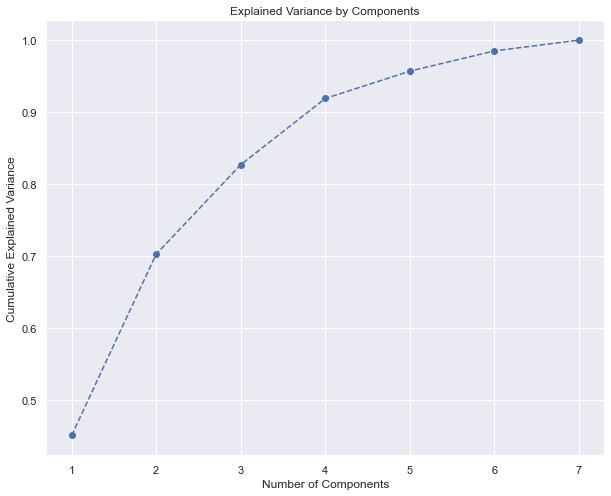

In [11]:
# Plot the cumulative variance explained by total number of components
# On this graph we choose the subset of components we want to keep
# Generally, we want to keep around 80 % of the explained variance
# => therfore we keep 3 variables to maintain >80% of the variance
plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [12]:
# We choose to reduce 7 factors/dimensions to 3 dimensions
pca = PCA(n_components=3)
pca.fit(df_segmentation_std)

PCA(n_components=3)

In [13]:
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pd.DataFrame(pca.components_)
# 3 pca components v 7 orignal features

,0,1,2,3,4,5,6
0,-0.112546,-0.058339,0.496857,0.203952,0.661039,0.329834,0.386916
1,0.075829,0.005722,0.726805,0.381337,-0.266868,-0.306449,-0.394239
2,0.535210,0.599474,-0.240296,0.392512,0.282475,0.107037,-0.226106


In [14]:
df_pca_components = pd.DataFrame(data=pca.components_,
                            columns=df_segmentation.columns.values,
                            index=['Component 1', 'Component 2', 'Component 3'])
df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.112546,-0.058339,0.496857,0.203952,0.661039,0.329834,0.386916
Component 2,0.075829,0.005722,0.726805,0.381337,-0.266868,-0.306449,-0.394239
Component 3,0.535210,0.599474,-0.240296,0.392512,0.282475,0.107037,-0.226106


([<matplotlib.axis.YTick at 0x2e3efdcbbe0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

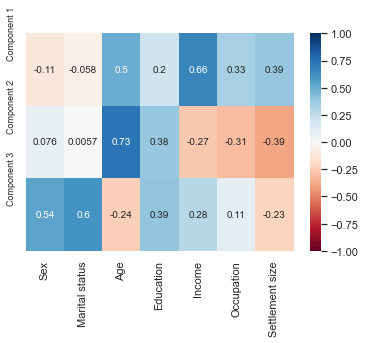

In [15]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_components,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.yticks([0, 1, 2],
            ['Component 1', 'Component 2', 'Component 3'],
            rotation=90,
            fontsize=9)

In [16]:
# Analysis - Compare Scores to make new field names
# Component 1 - Highest absolute scores - Age + Income => Lifestyle Focus
# Component 2 - Highest absolute scores - Age + Education => Career Focus
# Component 3 - Highest absolute scores - Sex + Marital Status => Life Experience Focus

# Now our 7 categories i.e., ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'] 4
# are now reduced to 3 categories i.e., ['Lifestyle Focus', 'Career Focus', 'Life Experience Focus']

In [17]:
df_pca_components = pd.DataFrame(data=pca.components_,
                                    columns=df_segmentation.columns.values,
                                    index=['Lifestyle Focus', 'Career Focus', 'Life Experience Focus'])
df_pca_components

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Lifestyle Focus,-0.112546,-0.058339,0.496857,0.203952,0.661039,0.329834,0.386916
Career Focus,0.075829,0.005722,0.726805,0.381337,-0.266868,-0.306449,-0.394239
Life Experience Focus,0.535210,0.599474,-0.240296,0.392512,0.282475,0.107037,-0.226106


In [18]:
df_segmentation_pca = pca.transform(df_segmentation_std)
pd.DataFrame(df_segmentation_pca)

,0,1,2
0,2.209938,1.676779,-1.039575
1,0.379699,-1.597321,0.819046
2,-0.476246,1.522160,-0.980652
3,1.499771,-0.003517,-0.407090
4,1.448050,0.650585,-0.738235
...,...,...,...
1995,-0.078225,1.233563,-0.150006
1996,-0.755167,-0.267327,0.923829
1997,-1.492273,0.043916,-1.024831
1998,-1.555343,-0.008454,0.731697


In [19]:
df_segmentation_pca = pd.DataFrame(df_segmentation_pca, columns=['Lifestyle Focus', 'Career Focus', 'Life Experience Focus'])
df_segmentation_pca

,Lifestyle Focus,Career Focus,Life Experience Focus
0,2.209938,1.676779,-1.039575
1,0.379699,-1.597321,0.819046
2,-0.476246,1.522160,-0.980652
3,1.499771,-0.003517,-0.407090
4,1.448050,0.650585,-0.738235
...,...,...,...
1995,-0.078225,1.233563,-0.150006
1996,-0.755167,-0.267327,0.923829
1997,-1.492273,0.043916,-1.024831
1998,-1.555343,-0.008454,0.731697


5 - K-Means Clustering - Clustering

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_segmentation_pca)
    wcss.append(kmeans.inertia_)

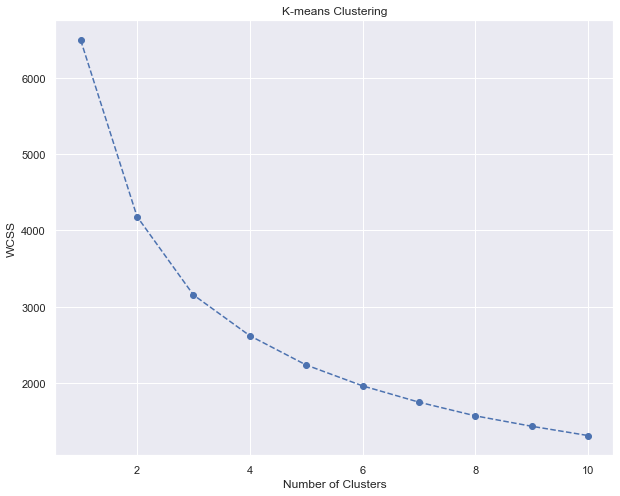

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [22]:
# We run K-means with a fixed number of clusters
# In our case - n_clusters = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_segmentation_pca)
print(kmeans.labels_)

[1 2 3 ... 0 0 0]


In [23]:
df_segmentation_pca['Segment K-means'] = kmeans.labels_
df_segmentation_pca

,Lifestyle Focus,Career Focus,Life Experience Focus,Segment K-means
0,2.209938,1.676779,-1.039575,1
1,0.379699,-1.597321,0.819046,2
2,-0.476246,1.522160,-0.980652,3
3,1.499771,-0.003517,-0.407090,1
4,1.448050,0.650585,-0.738235,1
...,...,...,...,...
1995,-0.078225,1.233563,-0.150006,3
1996,-0.755167,-0.267327,0.923829,0
1997,-1.492273,0.043916,-1.024831,0
1998,-1.555343,-0.008454,0.731697,0


6 - K-Means Clustering - Analysis

In [24]:
# Calculate mean values for different features grouped by the clusters
df_segmentation_analysis = df_segmentation_pca.groupby(['Segment K-means']).mean()
df_segmentation_analysis

,Lifestyle Focus,Career Focus,Life Experience Focus
Segment K-means,,,
0,-1.177372,-0.114769,0.289661
1,2.235034,0.672106,0.180024
2,0.515633,-0.896892,-0.235999
3,-0.233479,1.173368,-0.296529


In [25]:
mean_list = np.array([df_segmentation_analysis['Lifestyle Focus'].mean(), df_segmentation_analysis['Career Focus'].mean(),
                        df_segmentation_analysis['Life Experience Focus'].mean()])
mean_list = pd.DataFrame(mean_list.reshape(1, 3), columns=['Lifestyle Focus', 'Career Focus', 'Life Experience Focus'])
mean_list.rename({0:"Average"})

,Lifestyle Focus,Career Focus,Life Experience Focus
Average,0.334954,0.208453,-0.015711


In [26]:
# Analysis
# Cluster 0 - highest life experience => fewer opportunities <= didn't get a chance to focus on lives and career opportunities
# Cluster 1 - best lifestyles => well off living
# Cluster 2 - everything avg => standard living
# Cluster 3 - highest career focus => career focused lives

In [27]:
df_segmentation_pca[['Segment K-means', 'Lifestyle Focus']
                ].groupby(['Segment K-means']).count()

,Lifestyle Focus
Segment K-means,
0,722
1,278
2,617
3,383


In [28]:
df_segmentation_pca[['Segment K-means', 'Career Focus']
                    ].groupby(['Segment K-means']).count()
# any measure will work

,Career Focus
Segment K-means,
0,722
1,278
2,617
3,383


In [29]:
# Compute the size and proportions of the four clusters
df_segmentation_analysis['Number_Observation'] = df_segmentation_pca[['Segment K-means', 'Lifestyle Focus']].groupby(['Segment K-means']).count()
df_segmentation_analysis['Proportion_Observation'] = df_segmentation_analysis['Number_Observation'] / 2000
# df_segmentation_analysis['Number_Observation'].sum() => 2000
df_segmentation_analysis

,Lifestyle Focus,Career Focus,Life Experience Focus,Number_Observation,Proportion_Observation
Segment K-means,,,,,
0,-1.177372,-0.114769,0.289661,722,0.3610
1,2.235034,0.672106,0.180024,278,0.1390
2,0.515633,-0.896892,-0.235999,617,0.3085
3,-0.233479,1.173368,-0.296529,383,0.1915


In [30]:
df_segmentation_analysis.rename({0:'Fewer Opportunities',
                            1:'Well Off',
                            2:'Standard Living',
                            3:'Career Focused'})

,Lifestyle Focus,Career Focus,Life Experience Focus,Number_Observation,Proportion_Observation
Segment K-means,,,,,
Fewer Opportunities,-1.177372,-0.114769,0.289661,722,0.3610
Well Off,2.235034,0.672106,0.180024,278,0.1390
Standard Living,0.515633,-0.896892,-0.235999,617,0.3085
Career Focused,-0.233479,1.173368,-0.296529,383,0.1915


In [31]:
# Analysis
# Most of our population are either Standard Living or Below Standard Living (Fewer Opportunities)

In [32]:
df_segmentation_pca['Labels'] = df_segmentation_pca['Segment K-means'].map({0: 'Fewer Opportunities',
                                                                    1: 'Well Off',
                                                                    2: 'Standard Living',
                                                                    3: 'Career Focused'})
df_segmentation_pca

,Lifestyle Focus,Career Focus,Life Experience Focus,Segment K-means,Labels
0,2.209938,1.676779,-1.039575,1,Well Off
1,0.379699,-1.597321,0.819046,2,Standard Living
2,-0.476246,1.522160,-0.980652,3,Career Focused
3,1.499771,-0.003517,-0.407090,1,Well Off
4,1.448050,0.650585,-0.738235,1,Well Off
...,...,...,...,...,...
1995,-0.078225,1.233563,-0.150006,3,Career Focused
1996,-0.755167,-0.267327,0.923829,0,Fewer Opportunities
1997,-1.492273,0.043916,-1.024831,0,Fewer Opportunities
1998,-1.555343,-0.008454,0.731697,0,Fewer Opportunities


7 - Plot Graph

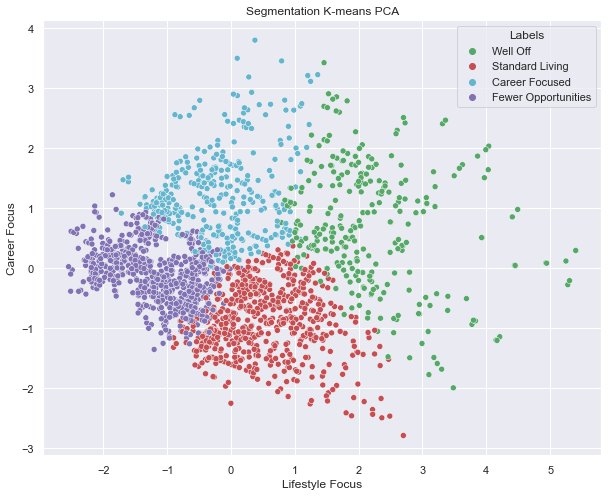

In [33]:
x_axis = df_segmentation_pca['Lifestyle Focus']
y_axis = df_segmentation_pca['Career Focus']
plt.figure(figsize=(10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue=df_segmentation_pca['Labels'], palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means PCA')
plt.show()

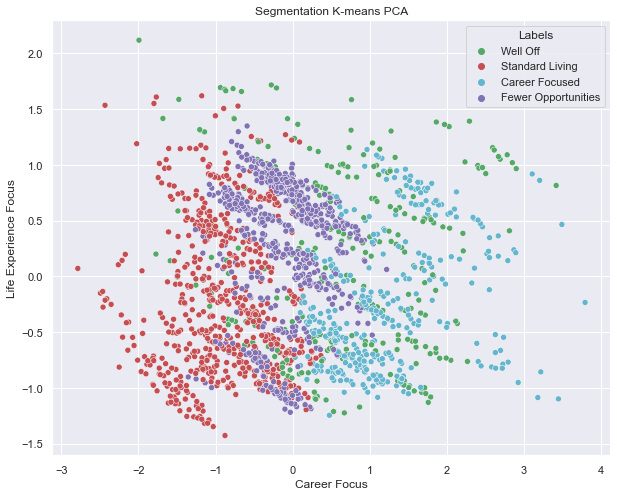

In [34]:
x_axis = df_segmentation_pca['Career Focus']
y_axis = df_segmentation_pca['Life Experience Focus']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segmentation_pca['Labels'], palette=[
                'g', 'r', 'c', 'm'])
plt.title('Segmentation K-means PCA')
plt.show()

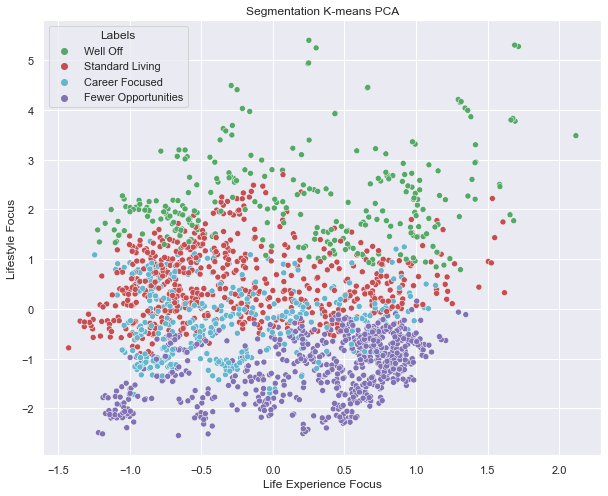

In [35]:
x_axis = df_segmentation_pca['Life Experience Focus']
y_axis = df_segmentation_pca['Lifestyle Focus']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segmentation_pca['Labels'], palette=[
                'g', 'r', 'c', 'm'])
plt.title('Segmentation K-means PCA')
plt.show()

7 - Export Module

In [36]:
# We save the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))
pickle.dump(pca, open('pca.pickle', 'wb'))
pickle.dump(kmeans, open('kmeans_pca.pickle', 'wb'))